In [24]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

#Non-linear filtering

##Rank vs. weighted sum

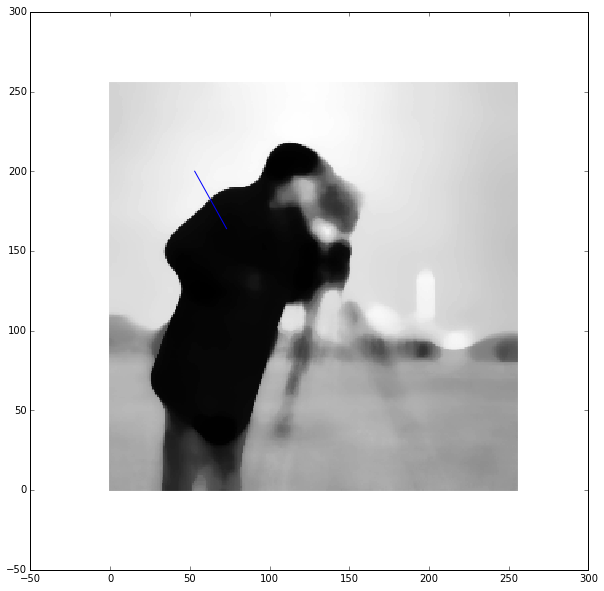

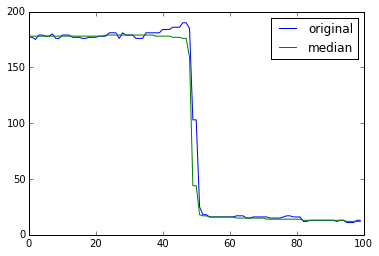

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import ndimage

from skimage.data import camera
import skimage.filters.rank as skr
from skimage.morphology import disk

def profile(ima,p0,p1,num):
    n = np.linspace(p0[0],p1[0],num)
    m = np.linspace(p0[1],p1[1],num)
    return [n,m,ndimage.map_coordinates(ima, [m,n], order=0)]

im = camera()[-1::-2,::2]

#filtered version
rank = skr.median(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='median')
plt.legend();


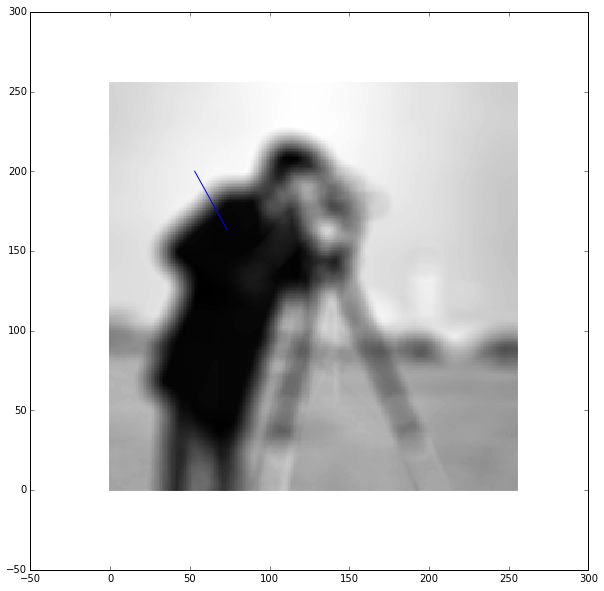

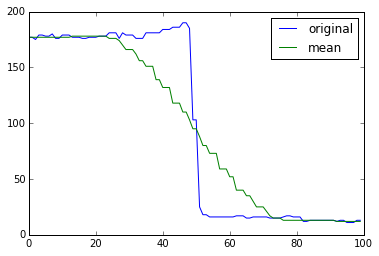

In [26]:
#filtered version
mean = skr.mean(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,pmean] = profile(mean,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.imshow(mean,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(pmean,label='mean')
plt.legend();


##Local maximum, local minimum, Morph.gradient

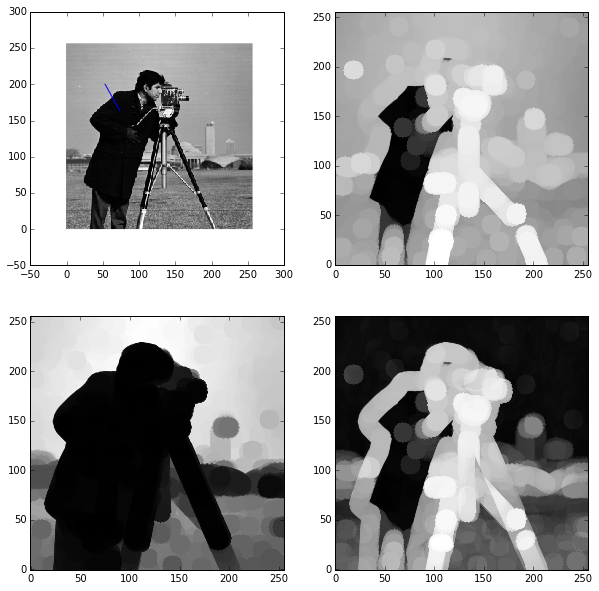

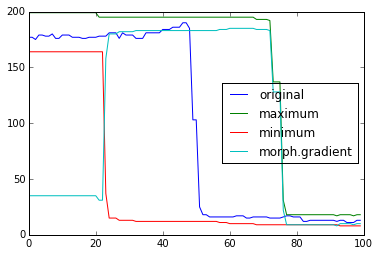

In [27]:
#filtered version
rank1 = skr.maximum(im,disk(10))
rank2 = skr.minimum(im,disk(10))
rank3 = skr.gradient(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank1] = profile(rank1,(53,200),(73,164),100)
[x,y,prank2] = profile(rank2,(53,200),(73,164),100)
[x,y,prank3] = profile(rank3,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)
plt.subplot(2,2,2)
plt.imshow(rank1,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,3)
plt.imshow(rank2,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(2,2,4)
plt.imshow(rank3,interpolation='nearest',cmap=cm.gray,origin='lower')

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank1,label='maximum')
plt.plot(prank2,label='minimum')
plt.plot(prank3,label='morph.gradient')
plt.legend(loc=5);

##Local contrast enhancement

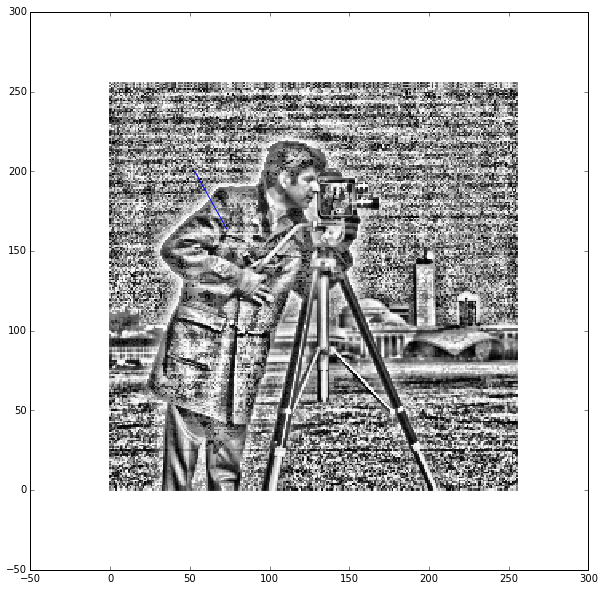

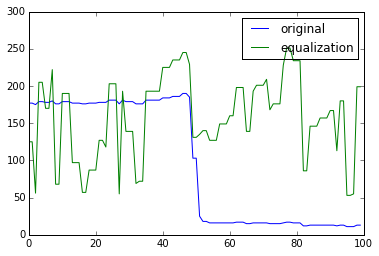

In [28]:
#local equalization
rank = skr.equalize(im,disk(10))
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='equalization')
plt.legend();


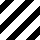
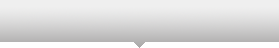
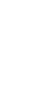
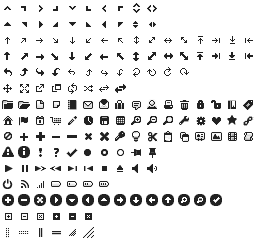
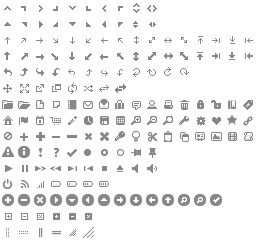
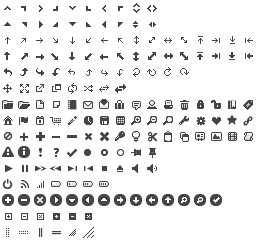
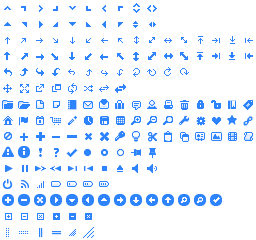
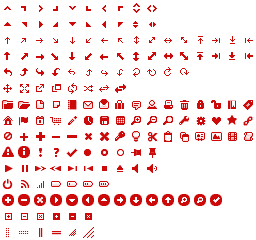
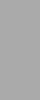
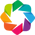
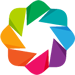
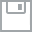
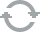
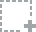
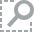
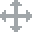
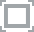
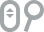

In [29]:
#local auto-level
from skimage.io import imread
ima = imread('http://homepages.ulb.ac.be/~odebeir/data/bones.png')
rank = skr.autolevel(ima,disk(10))

import bokeh.plotting as bk
from helpers import bk_image,bk_image_hoover,bk_compare_image
bk.output_notebook()

bk_compare_image(ima,rank)



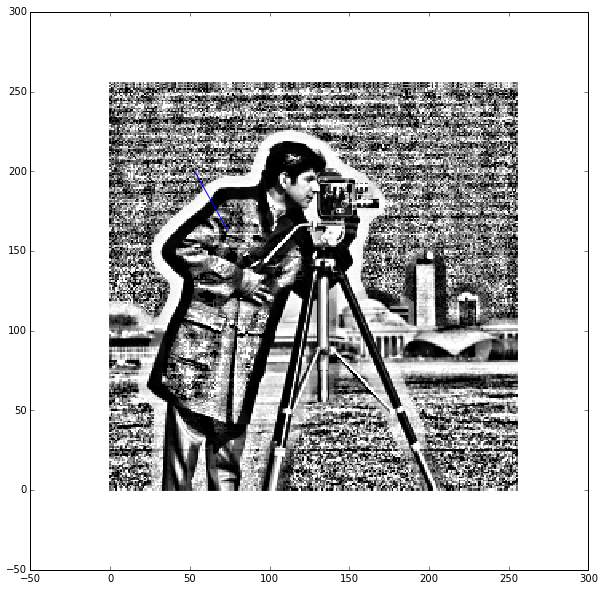

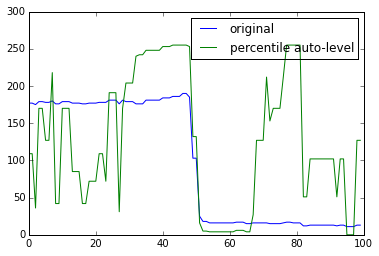

In [30]:
#local soft autolevel
rank = skr.autolevel_percentile(im,disk(10),p0=.1,p1=.9)
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='percentile auto-level')
plt.legend()
plt.show()

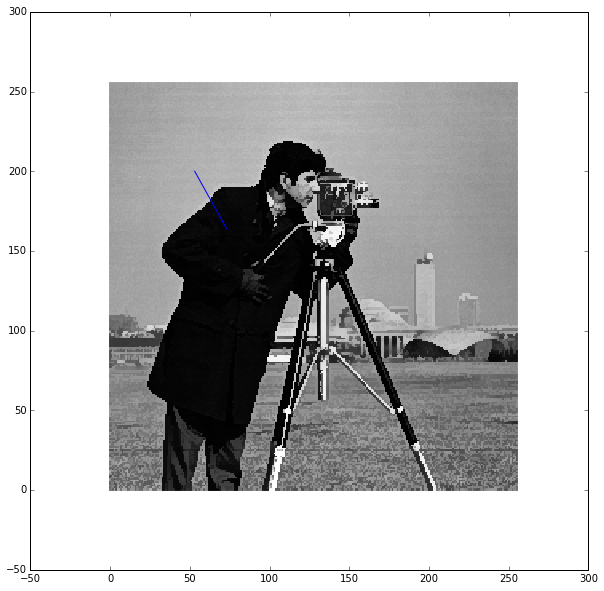

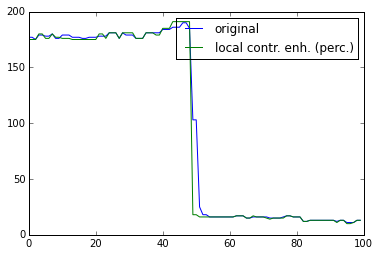

In [31]:
#local soft autolevel
rank = skr.enhance_contrast_percentile(im,disk(2),p0=.1,p1=.9)
[x,y,p] = profile(im,(53,200),(73,164),100)
[x,y,prank] = profile(rank,(53,200),(73,164),100)

fig = plt.figure(1,figsize=[10,10])
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(2)
plt.plot(p,label='original')
plt.plot(prank,label='local contr. enh. (perc.)')
plt.legend()
plt.show()

##Local threshold

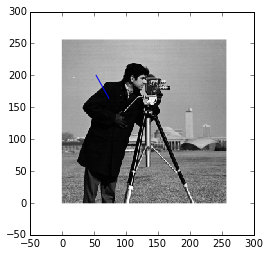

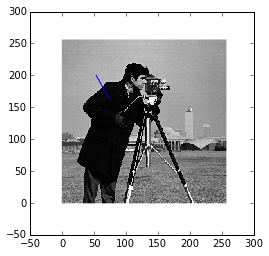

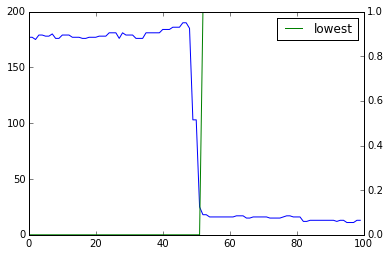

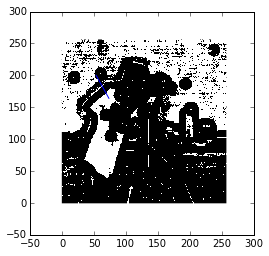

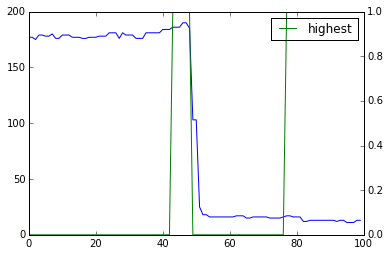

In [32]:
p0 = (53,200)
p1 =(73,164)

[x,y,p] = profile(im, p0, p1,100)
[x,y,prank] = profile(rank, p0, p1,100)

fig = plt.figure(0)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(1)
plt.imshow(rank,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

low = im<=(skr.minimum(im,disk(10))+10)
[x,y,p] = profile(im, p0, p1,100)
[x,y,prank] = profile(low, p0, p1,100)

fig = plt.figure(2)
ax1 = plt.subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(p,label='original')
ax2.plot(prank,'g',label='lowest')
ax2.legend()

high = im>=(skr.maximum(im,disk(10))-10)
[x,y,p] = profile(im, p0, p1,100)
[x,y,prank] = profile(high, p0, p1,100)

fig = plt.figure(3)
plt.imshow(high,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.plot(x,y)

fig = plt.figure(4)
ax1 = plt.subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(p,label='original')
ax2.plot(prank,'g',label='highest')
ax2.legend()

plt.show()